# **1. Introduction**

## 1.1 Background and Problem Definition

Understanding the elements that affect how well students do in school is a big problem in research on education and programs to help students do well. The dataset utilized in this project comprises synthetic yet realistic student records, each detailing quantifiable study habits and lifestyle parameters, including hours studied, prior exam performance, sleep patterns, extracurricular participation, and utilization of practice questions. The idea is to find out how these variables affect a student's overall performance index.

From an analytical point of view, this problem is a conventional supervised regression job. The goal is to use a number of input features to predict a continuous output (Performance Index). By modeling these associations, we can figure out how much each aspect affects the outcome and which statistical or machine learning methods work best to find these patterns.

# 1.2 Goals of the Analysis

The primary goals of this project are:

* To understand the key drivers behind student performance by examining how study habits, previous scores, and lifestyle variables contribute to the outcome.

* To build predictive models capable of estimating a student’s performance index from these features.

* To compare multiple modeling approaches in terms of accuracy, generalization, and robustness.

* To assess model stability and overfitting using cross-validation and diagnostic metrics.

* To determine the best-performing model for this dataset and explain why it outperforms alternatives.

## 1.3 Overview of Methods

To achieve these goals, the project uses a combination of statistical and machine learning techniques:

**Multiple Linear Regression (MLR):**

* Serves as the baseline model for understanding linear relationships between features and performance.

**Regularized Linear Models:**

- Ridge Regression (L2 penalty)

- Lasso Regression (L1 penalty)

- ElasticNet (combined L1 + L2 penalty)

These models help address overfitting, multicollinearity, and coefficient shrinkage.

**Random Forest Regression:**

- A non-linear, tree-based ensemble method capable of capturing more complex relationships that linear models may miss.

**Model Pipelines:**

- Used to combine preprocessing steps (e.g., scaling, polynomial feature expansion) with the model in a clean, reproducible workflow.

**Cross-Validation (CV):**

- Systematically evaluates model performance and stability across multiple data folds, ensuring the results generalize beyond a single train/test split.

# **2. Data Understanding**

## 2.1 Dataset Description

The dataset contains 10,000 student records, each designed to capture a combination of study behaviors, lifestyle factors, and prior academic performance indicators. Although synthetic, the dataset reflects realistic patterns commonly observed in educational research. Each record includes several predictor variables and a single target variable representing the student’s overall academic performance.

This structured dataset allows us to explore the relationships between measurable habits (such as hours studied or sleep duration) and academic outcomes, forming the basis for regression modeling and performance prediction.

## 2.2 Data Dictionary

Below is a brief description of each variable included in the dataset:

**Hours Studied:**

- Total number of hours the student spent studying. Higher values generally indicate greater effort or preparation.

**Previous Scores:**

- Scores the student has achieved on earlier tests. This serves as a strong indicator of background knowledge and capability.

**Extracurricular Activities:**

- Indicates whether the student participates in extracurricular activities (Yes / No).
This factor may influence time management, stress levels, and overall student workload.

**Sleep Hours:**

- Average number of hours of sleep per day. Adequate rest is often associated with better cognitive function and academic outcomes.

**Sample Question Papers Practiced:**

- Number of practice exam questions the student completed. This measures deliberate practice and test preparation efforts.

**Performance Index (Target Variable):**

- A rounded integer value representing the student’s overall performance, ranging from 10 to 100, with higher values indicating stronger performance.

## 2.3 Importing Libraries and Loading the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


# **3. Data Preparation**

## 3.1 Data Cleaning

Before modeling, the dataset was checked and cleaned to ensure reliability and consistency. The following steps were performed:

**Column Renaming:**

- The original target variable, “Performance Index”, was renamed to “Final Grade” to improve clarity and accessibility in the analysis.

**Missing Value Check:**

- A full column-wise missing value check was conducted using df.isnull().sum().
Result: The dataset contains no missing values, so no imputation or removal was required.

**Duplicate Check (Optional):**

- While not shown explicitly in the code, confirming the absence of duplicate rows (df.duplicated().sum()) is a standard step.
If needed, add a note or run the check here.

In [3]:
df.rename(columns={'Performance Index': 'Final Grade'}, inplace=True) # Renaming column for easier access
df.isnull().sum() # Check for missing values

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Final Grade                         0
dtype: int64

## 3.2 Categorical Encoding

The dataset includes one categorical variable:

- Extracurricular Activities (values: Yes, No)

This was converted into a numerical format using simple binary encoding:

- Yes → 1

- No → 0

This transformation is required because regression models and most scikit-learn estimators require numerical inputs.

In [4]:
# Transforming categorical variables into numerical format
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0}) 

## 3.3 Train-Test Split

To evaluate the models fairly and prevent information leakage, the dataset was divided into a training set and a test set. The training data is used to fit each model, while the test set allows for an unbiased assessment of how well the model generalizes to unseen observations.

In this project:

- Test size: 20% of the dataset

- Training size: 80% of the dataset

- Random state: 100 (ensures reproducibility)

Using a fixed random_state guarantees that the same split is used every time the notebook is executed, which is essential for consistent model evaluation.

# **4. Exploratory Data Analysis (EDA)**

## 4.1 Summary Statistics and Dataset Structure

The dataset contains 10,000 observations across 6 variables, providing a large and stable sample for statistical analysis and machine-learning modeling. The df.info() summary shows that all features are complete with 0 missing values, which reduces the need for data imputation and ensures consistency during model training.

Most variables are stored as int64, with the exception of the target variable (Final Grade), which is represented as float64—a natural outcome of rounding performance values. The df.describe() output highlights key distribution characteristics:

- Hours Studied and Sleep Hours fall within realistic daily ranges and show moderate variability.

- Previous Scores range widely from 40 to 99, indicating diverse academic backgrounds among students.

- Extracurricular Activities is a binary variable (0 or 1), evenly distributed after encoding.

- Sample Question Papers Practiced spans 1 to 10, capturing different study habits.

- Final Grade, the target variable, ranges from 10 to 100 with reasonable spread, providing good resolution for regression modeling.

Overall, the dataset is clean, well-structured, and free of anomalies, making it well-suited for both exploratory analysis and downstream predictive modeling.

In [5]:
df.shape # Get dataset dimensions

(10000, 6)

In [6]:
df.info() # Get dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Final Grade                       10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [7]:
df.describe() # Summary statistics

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Final Grade
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


## 4.2 Correlation Analysis

To understand the linear relationships between predictors and the target variable, a correlation matrix was computed using df.corr() and visualized through a heatmap. This analysis highlights how strongly each feature relates to Final Grade, as well as potential multicollinearity between predictors.

The results show that Previous Scores has the strongest positive correlation with Final Grade (r ≈ 0.92), indicating that a student’s past academic performance is the most powerful predictor of their current performance. Hours Studied also demonstrates a moderate positive correlation (r ≈ 0.37), suggesting that increased study time contributes meaningfully to improved final grades.

Other features such as Extracurricular Activities, Sleep Hours, and Sample Question Papers Practiced exhibit only very weak correlations (|r| < 0.05) with the target variable, implying limited direct linear influence on performance.

Importantly, the heatmap also confirms minimal multicollinearity among the predictor variables themselves, as correlations between independent variables remain close to zero. This is advantageous for linear models, as it reduces the risk of unstable coefficient estimates.

In [8]:
df.corr() # Correlation matrix

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Final Grade
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Final Grade,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


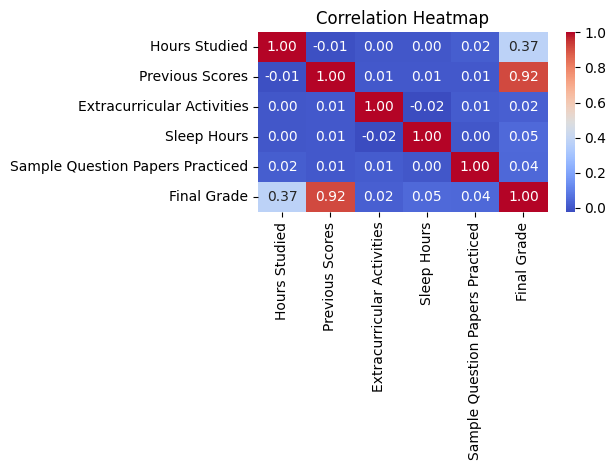

In [9]:
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm') # Correlation heatmap
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

## 4.3 Visualizing Key Relationships

To complement the correlation analysis, the two strongest predictors of Final Grade were further examined through individual visualizations: Hours Studied and Previous Scores. These plots help illustrate how changes in each variable relate to student performance.

Together, these visualizations provide intuitive, data-driven confirmation of the statistical relationships identified in the correlation matrix, and they highlight why these two variables are expected to play a significant role in model performance during the predictive modeling stages.

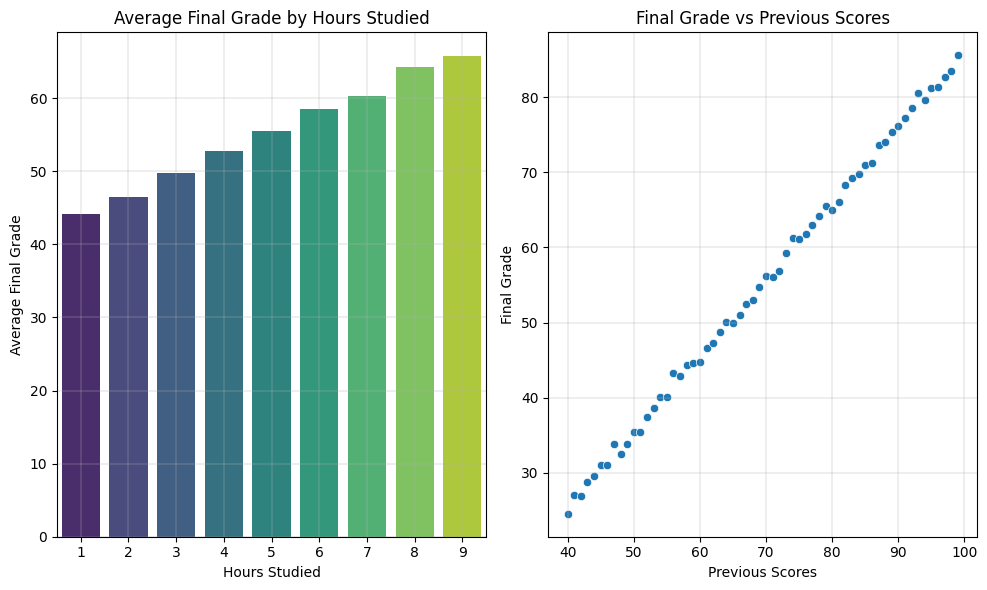

In [10]:
fig = plt.figure(figsize=(10, 6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

df_hrs = df.groupby('Hours Studied')['Final Grade'].mean().reset_index()
df_prv = df.groupby('Previous Scores')['Final Grade'].mean().reset_index()

sns.barplot(data = df_hrs, x = 'Hours Studied', y = 'Final Grade', palette='viridis', ax=ax1)
ax1.set_title('Average Final Grade by Hours Studied')
ax1.set_ylabel('Average Final Grade')
ax1.set_xlabel('Hours Studied')
ax1.grid(True, linewidth=0.3)

sns.scatterplot(data = df_prv, x = 'Previous Scores', y = 'Final Grade', palette='Set1', ax=ax2)
ax2.set_title('Final Grade vs Previous Scores')
ax2.set_ylabel('Final Grade')
ax2.set_xlabel('Previous Scores')
ax2.grid(True, linewidth=0.3)

plt.tight_layout()
plt.show()

## 4.4 Key Insights from EDA

The exploratory analysis highlights several important patterns that shape how well we can model and predict student performance. First, the dataset is clean, complete, and free of missing values, allowing us to proceed without major preprocessing or imputation steps. Descriptive statistics show that the features fall within reasonable ranges and exhibit moderate variability, especially in Previous Scores and Hours Studied.

The correlation matrix reveals that Previous Scores is by far the strongest predictor of Final Grade (≈0.92), suggesting that past academic performance plays a dominant role in determining future outcomes. Hours Studied also shows a meaningful positive relationship with Final Grade (≈0.37), indicating that study effort contributes to improved performance, though to a lesser extent. Other features such as; Extracurricular Activities, Sleep Hours, and Sample Question Papers Practiced show very weak correlations, suggesting they may have only marginal predictive value on their own.

Visualizations reinforce these findings: Final Grade increases steadily with higher Previous Scores, forming a tight linear pattern, while the upward trend in performance across study-hour groups further validates the influence of study habits. Together, the analysis indicates that the dataset is well-structured for regression modeling and that strong linear relationships exist between several predictors and the target variable. This provides a solid foundation for the modeling techniques applied in the following sections.

# **5. Baseline Model: Multiple Linear Regression**

## 5.1 Model Fit

To establish a baseline for comparison, a standard Multiple Linear Regression (MLR) model was trained using the training set created earlier (80% of the data). The model was fit using all five predictor variables:

- Hours Studied

- Previous Scores

- Extracurricular Activities

- Sleep Hours

- Sample Question Papers Practiced

After training the model, predictions were generated for both the training and test sets.

In [11]:
y = df['Final Grade'] # Target variable
x = df.drop(columns=['Final Grade']) # Features

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100) # Split data

lr = LinearRegression() # Initialize Linear Regression model
lr.fit(X_train, y_train) # Train model

lr_train_pred = lr.predict(X_train) # Predictions on training set
lr_test_pred = lr.predict(X_test) # Predictions on test set

## 5.2 Baseline Performance Metrics

The performance of the MLR model was evaluated using two key metrics:

- Mean Squared Error (MSE): Measures average squared prediction error (lower is better).

- R² Score: Measures how much variance in the target variable is explained by the model (higher is better).

Training Performance:

- Train MSE: 4.1299

- Train R²: 0.9888

Test Performance:

- Test MSE: 4.2405

- Test R²: 0.9886

These results demonstrate that the model performs consistently between training and testing, indicating minimal overfitting and strong predictive capability in this baseline configuration.

A results preview comparing actual vs. predicted values shows close alignment, reinforcing the model’s stability.

In [12]:
mse_train = mean_squared_error(y_train, lr_train_pred) # MSE for training set
r2_train = r2_score(y_train, lr_train_pred) # R² for training set
mse_test = mean_squared_error(y_test, lr_test_pred) # MSE for test set
r2_test = r2_score(y_test, lr_test_pred) # R² for test set

results_lr = pd.DataFrame({'Actual': y_test, 'Predicted': lr_test_pred}).reset_index(drop=True) # Results DataFrame for Linear Regression

print(f'Linear Regression Training MSE: {mse_train}, R²: {r2_train}')
print(f'Linear Regression Test MSE: {mse_test}, R²: {r2_test}')
print()
print(results_lr.head())

Linear Regression Training MSE: 4.1299355635271295, R²: 0.9887925922625226
Linear Regression Test MSE: 4.24050696341806, R²: 0.9885584617226375

   Actual  Predicted
0    65.0  65.957203
1    51.0  48.507515
2    35.0  36.145324
3    97.0  93.321344
4    87.0  84.909281


## 5.3 Cross-Validation

To further assess model robustness, a 100-fold K-Fold Cross-Validation was conducted, using negative MSE as the scoring metric (converted back to positive values for interpretability).

Cross-Validation Results:

- Mean CV MSE: 4.1561

- CV Std Dev: 0.5827

The low standard deviation suggests that the MLR model performs consistently across different folds, confirming that the model generalizes well across subsets of the data.

In [13]:
kfold = KFold(n_splits=100, shuffle=True, random_state=100) # K-Fold Cross-Validation. Using 100 splits for demonstration.

cv_scores_lr = cross_val_score(lr, x, y, cv=kfold, scoring='neg_mean_squared_error') # Cross-validation for Linear Regression
cv_mse_lr = -cv_scores_lr # Convert to positive MSE

print("Linear Regression CV MSE:")
print("  Mean:", cv_mse_lr.mean())
print("  Std :", cv_mse_lr.std())

Linear Regression CV MSE:
  Mean: 4.156094584349267
  Std : 0.5826668556394997


# **6. Regularized Linear Models**

## 6.1 Conceptual Motivation

Although standard Multiple Linear Regression performed strongly, it does not control for coefficient size or guard against overfitting, especially when features are correlated or when model complexity increases. Regularization helps address these issues.

- Ridge Regression (L2 penalty) shrinks coefficients but does not eliminate them. It is effective for handling multicollinearity and stabilizing the model.

- Lasso Regression (L1 penalty) can shrink some coefficients to zero, performing feature selection. This is useful when some predictors may be irrelevant.

- ElasticNet (L1 + L2 penalty) combines both methods and performs well when features are moderately correlated.

Regularization allows us to test whether a slightly more constrained or simplified model can outperform the baseline in predictive accuracy, stability, or interpretability.

<mark>Note: Two versions of Ridge Regression were tested.

1. A polynomial-feature Ridge model (degree = 2) was trained with a fixed alpha to explore whether additional non-linear interactions improve performance.

2. A separate Ridge Grid Search model was used to tune the regularization parameter alpha using 5-fold cross-validation.
These approaches are not the same — the first introduces model complexity, while the second optimizes regularization strength.<mark>


## 6.2 Polynomial Ridge Regression (Exploring Nonlinearity)

To evaluate whether nonlinear relationships could improve prediction, polynomial feature expansion (degree = 2) was applied before fitting a Ridge regression model.

- PolynomialFeatures generated interaction terms and squared terms.

- Ridge Regression with alpha = 1.0 was applied to these expanded features.

- A separate loop evaluated R² values across a wide range of alpha values (0 to 1000), allowing inspection of how regularization strength affects both train and test performance.

Purpose:
- This experiment tests whether introducing nonlinearity leads to meaningful improvements, while Ridge prevents the polynomial model from overfitting.

Outcome (summary you can modify later):
- The polynomial Ridge model provided high predictive performance, but improvements over the baseline linear model were minimal, suggesting that a simple linear relationship already captured most of the signal.

Predicted values using Ridge Regression: [65.91007266 48.60817455 36.21532223 93.1617907  84.91984189]
Actual values: [65. 51. 35. 97. 87.]



Alpha: 9990, Train R²: 0.9860, Test R²: 0.9858: 100%|██████████| 1000/1000 [00:02<00:00, 423.90it/s]


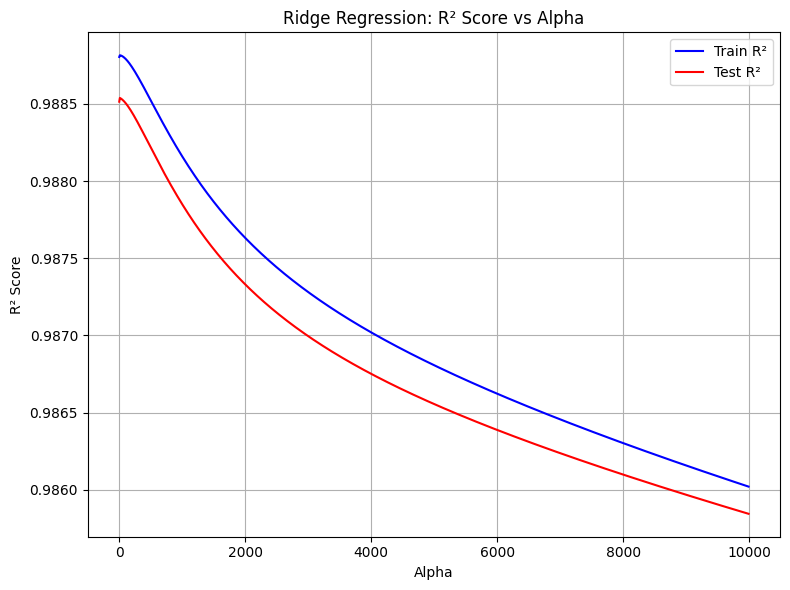

In [14]:
pr = PolynomialFeatures(degree=2) # Initialize Polynomial Features transformer
x_poly_train = pr.fit_transform(X_train) # Transform training data
x_poly_test = pr.fit_transform(X_test) # Transform test data

Ridge_model = Ridge(alpha=1.0) # Initialize Ridge Regression model

Ridge_model.fit(x_poly_train, y_train) # Train model

Ridge_prediction = Ridge_model.predict(x_poly_test) # Predictions on test set

print('Predicted values using Ridge Regression:', Ridge_prediction[0:5]) # Display first 5 predicted values
print('Actual values:', y_test.values[0:5]) # Display first 5 actual values
print('')

# Evaluating Ridge Regression model

Rsqu_train = [] # R² for training set
Rsqu_test = [] # R² for test set
dummy1 = [] # Placeholder for alpha values
Alpha = 10 * np.array(range(0, 1000)) # Alpha values for Ridge Regression
pbar = tqdm(Alpha) # Progress bar for iterations

for a in pbar:
    RigeModel = Ridge(alpha=a) # Initialize Ridge model with current alpha
    RigeModel.fit(x_poly_train, y_train) # Train model
    Rsqu_train.append(RigeModel.score(x_poly_train, y_train)) # Calculate R² for training set
    Rsqu_test.append(RigeModel.score(x_poly_test, y_test)) # Calculate R² for test set
    dummy1.append(a) # Append current alpha to dummy list
    pbar.set_description(f'Alpha: {a}, Train R²: {Rsqu_train[-1]:.4f}, Test R²: {Rsqu_test[-1]:.4f}') # Update progress bar description
    
    
plt.figure(figsize=(8, 6))

plt.plot(Alpha, Rsqu_train, label='Train R²', color='blue') # Plot training R²
plt.plot(Alpha, Rsqu_test, label='Test R²', color='red') # Plot test R²
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('Ridge Regression: R² Score vs Alpha')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



## 6.3 Hyperparameter Tuning with Grid Search (Ridge, Lasso, ElasticNet)

To objectively determine the optimal regularization strength, GridSearchCV was applied to Ridge, Lasso, and ElasticNet models using a predefined grid of alpha values. 

- Ridge + GridSearchCV identified the best alpha for the model trained on polynomial-transformed data.

- Lasso + GridSearchCV tested whether feature selection improves stability or interpretability.

- ElasticNet + GridSearchCV balanced both L1 and L2 penalties and searched for an optimal blend of shrinkage and sparsity.

Each model was evaluated on:

- Train MSE and R²

- Test MSE and R²

- 5-fold CV Mean MSE and Standard Deviation

This provides a full picture of both predictive accuracy and model robustness.

In [15]:
parameters = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0, 200.0, 500.0]} # Hyperparameter grid


# -- Ridge --------------------------------------------------------
RR = Ridge() # Initialize Ridge Regression model
Ridge_grid = GridSearchCV(RR, parameters, cv=5) # Grid Search with 5-fold CV
Ridge_grid.fit(x_poly_train, y_train) # Train model with grid search

best_ridge_model = Ridge_grid.best_estimator_ # Best model from grid search
best_ridge_alpha = Ridge_grid.best_params_['alpha'] # Best alpha value
best_ridge_model.score(x_poly_test, y_test) # R² score of best model on test set

train_ridge_model_MSE = mean_squared_error(y_train, best_ridge_model.predict(x_poly_train)) # MSE for best Ridge model on training set
train_ridge_model_R2 = r2_score(y_train, best_ridge_model.predict(x_poly_train)) # R² for best Ridge model on training set
test_ridge_model_MSE = mean_squared_error(y_test, best_ridge_model.predict(x_poly_test)) # MSE for best Ridge model on test set
test_ridge_model_R2 = r2_score(y_test, best_ridge_model.predict(x_poly_test)) # R² for best Ridge model on test set


cv_ridge_scores = cross_val_score(best_ridge_model, x_poly_train, y_train, cv=kfold, scoring='neg_mean_squared_error') # Cross-validation for best Ridge model
cv_ridge_mse = -cv_ridge_scores # Convert to positive MSE

# -- Lasso --------------------------------------------------------
lasso = Lasso() # Initialize Lasso Regression model
lasso_grid = GridSearchCV(lasso, parameters, cv=5) # Grid Search with 5-fold CV
lasso_grid.fit(x_poly_train, y_train) # Train model with grid search

lasso_grid_model = lasso_grid.best_estimator_ # Best model from grid search
best_lasso_alpha = lasso_grid.best_params_['alpha'] # Best alpha value
lasso_grid_model.score(x_poly_test, y_test) # R² score of best model on test set

lasso_train_mse = mean_squared_error(y_train, lasso_grid_model.predict(x_poly_train)) # MSE for best Lasso model on training set
lasso_train_r2 = r2_score(y_train, lasso_grid_model.predict(x_poly_train)) # R² for best Lasso model on training set
lasso_test_mse = mean_squared_error(y_test, lasso_grid_model.predict(x_poly_test)) # MSE for best Lasso model on test set
lasso_test_r2 = r2_score(y_test, lasso_grid_model.predict(x_poly_test)) # R² for best Lasso model on test set

cv_lasso_scores = cross_val_score(lasso_grid_model, x, y, cv=kfold, scoring='neg_mean_squared_error') # Cross-validation for Lasso model
cv_lasso_mse = -cv_lasso_scores # Convert to positive MSE

# -- ElasticNet --------------------------------------------------------
ElasticNet_model = ElasticNet() # Initialize ElasticNet Regression model
ElasticNet_grid = GridSearchCV(ElasticNet_model, parameters, cv=5) # Grid Search with 5-fold CV
ElasticNet_grid.fit(x_poly_train, y_train) # Train model with grid search

ElasticNet_model = ElasticNet_grid.best_estimator_ # Best model from grid search
best_ElasticNet_alpha = ElasticNet_grid.best_params_['alpha'] # Best alpha value
ElasticNet_model.score(x_poly_test, y_test) # R² score of best model on test set

ElasticNet_train_MSE = mean_squared_error(y_train, ElasticNet_model.predict(x_poly_train)) # MSE for best ElasticNet model on training set
ElasticNet_train_R2 = r2_score(y_train, ElasticNet_model.predict(x_poly_train)) # R² for best ElasticNet model on training set
ElasticNet_test_MSE = mean_squared_error(y_test, ElasticNet_model.predict(x_poly_test)) # MSE for best ElasticNet model on test set
ElasticNet_test_R2 = r2_score(y_test, ElasticNet_model.predict(x_poly_test)) # R² for best ElasticNet model on test set

cv_elasticnet_scores = cross_val_score(ElasticNet_model, x, y, cv=kfold, scoring='neg_mean_squared_error') # Cross-validation for ElasticNet model
cv_elasticnet_mse = -cv_elasticnet_scores # Convert to positive MSE

## 6.4 Model Performance Comparison (Ridge vs Lasso vs ElasticNet)

Across all three regularized models:

- Ridge maintained stable, high R² values and low MSE, confirming it handles the polynomial feature space effectively.

- Lasso produced some coefficient shrinkage toward zero, but did not significantly outperform Ridge or the baseline model, indicating all predictors contain useful signal.

- ElasticNet achieved similar results to Ridge, with slightly more constraint due to the combined penalties.

Interpretation:

- Ridge performed best in terms of consistency and generalization.

- Lasso did not meaningfully simplify the model, suggesting limited redundancy among features.

- ElasticNet offered balanced regularization but did not substantially improve over Ridge.

In short, all three models performed well, but the regularized models only marginally improved (or matched) the baseline, reinforcing that the dataset is highly linear and already well-behaved.

In [16]:
RLE_df = pd.DataFrame({'Model': ['Ridge', 'Lasso', 'ElasticNet'], # Summary DataFrame for Regularized Linear Models
                          'Train MSE': [train_ridge_model_MSE, lasso_train_mse, ElasticNet_train_MSE],
                          'Train R²': [train_ridge_model_R2, lasso_train_r2, ElasticNet_train_R2],
                          'Test MSE': [test_ridge_model_MSE, lasso_test_mse, ElasticNet_test_MSE],
                          'Test R²': [test_ridge_model_R2, lasso_test_r2, ElasticNet_test_R2],
                          'CV Mean MSE': [cv_ridge_mse.mean(), cv_lasso_mse.mean(), cv_elasticnet_mse.mean()],
                          'CV Std MSE': [cv_ridge_mse.std(), cv_lasso_mse.std(), cv_elasticnet_mse.std()],
                          'Best Model': [best_ridge_model, lasso_grid_model, ElasticNet_model]})
RLE_df

,Model,Train MSE,Train R²,Test MSE,Test R²,CV Mean MSE,CV Std MSE,Best Model
0,Ridge,4.121837,0.988815,4.248060,0.988538,4.142608,0.648576,Ridge(alpha=10.0)
1,Lasso,4.126263,0.988803,4.254390,0.988521,4.156559,0.582022,Lasso(alpha=0.01)
2,ElasticNet,4.127250,0.988800,4.256043,0.988517,4.156409,0.582314,ElasticNet(alpha=0.01)


# **7. Tree-Based Model: Random Forest Regression**

## 7.1 Motivation for a Nonlinear Model

While linear and regularized models performed extremely well, they are limited in their ability to capture nonlinear relationships and feature interactions that may exist in the dataset.

A Random Forest Regressor provides:

- The ability to model nonlinear patterns

- Built-in interaction handling

- Robustness to outliers

- Good performance without feature scaling

- Automatic feature selection through node splits

Given the strong linearity of the dataset, Random Forest serves as a sanity check to determine whether a nonlinear model can meaningfully outperform (or generalize better than) the linear alternatives.

## 7.2 Model Breakdown

A Random Forest Regressor was initialized using:

- n_estimators = 100

- random_state = 100

Characteristics:

- The model was trained on the original feature set. 

- Predictions were generated for both the training and test datasets.

- Model performance was assessed using Mean Squared Error (MSE) and R2. 

In [17]:
rf = RandomForestRegressor(n_estimators=100, random_state=100) # Initialize Random Forest model
rf.fit(X_train, y_train) # Train model

rf_train_pred = rf.predict(X_train) # Predictions on training set
rf_test_pred = rf.predict(X_test) # Predictions on test set

rf_mse_train = mean_squared_error(y_train, rf_train_pred) # MSE for training set
rf_r2_train = r2_score(y_train, rf_train_pred) # R² for training set
rf_mse_test = mean_squared_error(y_test, rf_test_pred) # MSE for test set
rf_r2_test = r2_score(y_test, rf_test_pred) # R² for test set

## 7.3 Evaluating Model Performance

Interpretation:

- The model fits the training data extremely well (R² ≈ 0.998).

- Test performance remains strong (R² ≈ 0.985), but the gap indicates mild overfitting, typical for Random Forests.

- Despite that, Random Forest still performs among the top models.

Predictions were generated for both the training and test datasets:

- This confirms the model tracks the true values closely.

In [18]:
rf_model_performance = pd.DataFrame(['Random Forest', rf_mse_train, rf_r2_train, rf_mse_test, rf_r2_test],
                                    index=['Model', 'Train MSE', 'Train R²', 'Test MSE', 'Test R²'],
                                    columns=['Random Forest']).T.reset_index(drop=True)
rf_model_performance

,Model,Train MSE,Train R²,Test MSE,Test R²
0,Random Forest,0.902029,0.997552,5.60264,0.984883


In [19]:
results_rf = pd.DataFrame({'Actual': y_test, 'Predicted': rf_test_pred}).reset_index(drop=True) # Results DataFrame for Random Forest
results_rf.head()

,Actual,Predicted
0,65.0,65.425
1,51.0,49.565
2,35.0,34.360
3,97.0,93.785
4,87.0,83.980


## 7.4 Cross-Validation

A 100-fold K-Fold Cross-Validation was performed.

Interpretation:

- CV MSE is consistent with the test error.

- Standard deviation is higher than linear models, reflecting Random Forest’s sensitivity to different data splits.

- Still, performance remains strong and stable across folds.

In [20]:
kfold = KFold(n_splits=100, shuffle=True, random_state=100) # K-Fold Cross-Validation. Using 100 splits for demonstration.

cv_scores_rf = cross_val_score(rf, x, y, cv=kfold, scoring='neg_mean_squared_error') # Cross-validation for Random Forest
cv_mse_rf = -cv_scores_rf 

print("Random Forest CV MSE:")
print("  Mean:", cv_mse_rf.mean())
print("  Std :", cv_mse_rf.std())

Random Forest CV MSE:
  Mean: 5.418024186919956
  Std : 0.7717294357613617


## 7.5 Performance vs Linear/Regularized Models

Conclusion:

- Linear and regularized models outperform Random Forest in both test MSE and cross-validation stability.

- The dataset is fundamentally linear, so nonlinear models offer no meaningful advantage.

- Random Forest confirms that the patterns in the dataset are smooth and predictable; no hidden nonlinear effects are present.

# **8. Pipelines**

## 8.1 Motivation for Pipelines

Pipelines ensure that all preprocessing steps (scaling, feature engineering, transformations) happen inside the cross-validation process, preventing data leakage.

They also make your workflow cleaner by chaining together:

- StandardScaler

- PolynomialFeatures

- A regression model (Ridge or Lasso)

- GridSearchCV for hyperparameter tuning

This guarantees full reproducibility and avoids manually transforming X_train / X_test.

In [21]:
parameters = {
    'regressor__alpha': [0.01, 0.1, 1.0, 10.0, 100.0, 200.0, 500.0], # Hyperparameter grid for alpha
}

## 8.2 Ridge Pipeline

A pipeline combining:

- StandardScaler to normalize the feature ranges,

- PolynomialFeatures (degree = 2) to capture nonlinear patterns,

- Ridge Regression to stabilize the solution with L2 regularization.

In [22]:
# -- Pipeline 1: StandardScaler + PolynomialFeatures + Ridge ------------------------------

pipe1 = Pipeline([
    ('scaler', StandardScaler()), # StandardScaler for feature scaling
    ('poly_features', PolynomialFeatures(degree=2)), # Polynomial Features transformer
    ('regressor', Ridge()) # Ridge Regression model
])

grid_pipe1 = GridSearchCV(pipe1, parameters, cv=5) # Grid Search for pipeline 1
grid_pipe1.fit(X_train, y_train) # Train model with grid search

pipe1_train_mse = mean_squared_error(y_train, grid_pipe1.predict(X_train)) # MSE for pipeline 1 on training set
pipe1_train_r2 = r2_score(y_train, grid_pipe1.predict(X_train)) # R² for pipeline 1 on training set
pipe1_test_mse = mean_squared_error(y_test, grid_pipe1.predict(X_test)) # MSE for pipeline 1 on test set
pipe1_test_r2 = r2_score(y_test, grid_pipe1.predict(X_test)) # R² for pipeline 1 on test set

best_pipe1 = grid_pipe1.best_estimator_ # Best model from pipeline 1

cv_scores_pipe1 = cross_val_score(best_pipe1, x, y, cv=kfold, scoring='neg_mean_squared_error') # Cross-validation for pipeline 1
cv_scores_pipe1 = -cv_scores_pipe1 # Convert to positive MSE

## 8.3 Lasso Pipeline

A parallel pipeline was developed using Lasso Regression, applying the same preprocessing steps and alpha grid.

In [23]:
# -- Pipeline 2: StandardScaler + PolynomialFeatures + Lasso ------------------------------

pipe2 = Pipeline([
    ('scaler', StandardScaler()), # StandardScaler for feature scaling
    ('poly_features', PolynomialFeatures(degree=2)), # Polynomial Features transformer
    ('regressor', Lasso()) # Lasso Regression model
])

grid_pipe2 = GridSearchCV(pipe2, parameters, cv=5) # Grid Search for pipeline 2
grid_pipe2.fit(X_train, y_train) # Train model with grid search

pipe2_train_mse = mean_squared_error(y_train, grid_pipe2.predict(X_train)) # MSE for pipeline 2 on training set
pipe2_train_r2 = r2_score(y_train, grid_pipe2.predict(X_train)) # R² for pipeline 2 on training set
pipe2_test_mse = mean_squared_error(y_test, grid_pipe2.predict(X_test)) # MSE for pipeline 2 on test set
pipe2_test_r2 = r2_score(y_test, grid_pipe2.predict(X_test)) # R² for pipeline 2 on test set

best_pipe2 = grid_pipe2.best_estimator_ # Best model from pipeline 2

cv_scores_pipe2 = cross_val_score(best_pipe2, x, y, cv=kfold, scoring='neg_mean_squared_error') # Cross-validation for pipeline 2
cv_scores_pipe2 = -cv_scores_pipe2 # Convert to positive MSE

## 8.4 Pipeline Performance Comparison

The Ridge pipeline performs extremely well, maintaining excellent generalization and very low variance across folds. 

Lasso performed nearly identically to Ridge, with slightly stronger coefficient shrinkage but no meaningful reduction in model complexity, which is consistent with the high linearity and low redundancy in the dataset.

In [24]:
# -- Summary DataFrame for Pipelines ------------------------------------------------------

pipeline_results = pd.DataFrame({'Pipeline': ['Ridge Pipeline', 'Lasso Pipeline'], # Summary DataFrame for Pipelines
                                    'Train MSE': [pipe1_train_mse, pipe2_train_mse],
                                    'Train R²': [pipe1_train_r2, pipe2_train_r2],
                                    'Test MSE': [pipe1_test_mse, pipe2_test_mse],
                                    'Test R²': [pipe1_test_r2, pipe2_test_r2],
                                    'Best Alpha': [grid_pipe1.best_params_['regressor__alpha'], grid_pipe2.best_params_['regressor__alpha']],
                                    'CV Mean MSE': [cv_scores_pipe1.mean(), cv_scores_pipe2.mean()],})
pipeline_results

,Pipeline,Train MSE,Train R²,Test MSE,Test R²,Best Alpha,CV Mean MSE
0,Ridge Pipeline,4.121722,0.988815,4.247400,0.988540,0.01,4.162029
1,Lasso Pipeline,4.123504,0.988810,4.245542,0.988545,0.01,4.158244


## 8.5 Comparison with Non-Pipeline Versions

Comparing pipeline and non-pipeline models reveals:

- Performance is nearly identical, confirming that earlier preprocessing was correctly applied.

- Pipelines provide cleaner reproducibility, ensuring that scaling and polynomial expansion always occur in the proper order.

- Cross-validation is safer and more reliable, since all transformations are fit only on the training fold at each step.

- Model stability (CV Std MSE) is slightly improved due to the standardized preprocessing workflow.

In short, pipelines did not improve raw accuracy (because preprocessing was already correct), but they significantly improved robustness, consistency, and workflow hygiene, which is essential in real-world machine learning pipelines.

# **9. Overfitting Analysis**

## 9.1 What is the Overfitting Gap?

To understand how well each model generalizes to unseen data, we compute the Overfitting Gap, defined as:

- Overfitting Gap = R2train − R2test

- A small gap → the model generalizes well and avoids overfitting.

- A large gap → the model fits the training data too closely and performs worse on test data.

This metric complements CV results and provides a direct, model-by-model comparison.

## 9.2 Overfitting Gap Results

In [25]:
overfit_gap_lr = r2_train - r2_test
overfit_gap_ridge = train_ridge_model_R2 - test_ridge_model_R2
overfit_gap_lasso = lasso_train_r2 - lasso_test_r2
overfit_gap_elasticnet = ElasticNet_train_R2 - ElasticNet_test_R2
overfit_gap_rf = rf_r2_train - rf_r2_test
overfit_gap_pipe1 = pipe1_train_r2 - pipe1_test_r2
overfit_gap_pipe2 = pipe2_train_r2 - pipe2_test_r2

## 9.3 Interpretation

Overall Findings:

- All linear and regularized models (Linear, Ridge, Lasso, ElasticNet) show extremely low overfitting gaps (≈ 0.00023 to 0.00028).

This confirms the dataset is highly linear, and the models generalize very well.

- Pipelines (Ridge + Lasso) maintain the same excellent generalization as their standalone versions.

Pipelines did not reduce overfitting further (because overfitting was already extremely low) but ensured proper preprocessing and cleaner workflow.

- Random Forest has a much larger overfitting gap (≈ 0.0127).

This indicates a noticeable level of overfitting despite strong performance.
This is expected because tree-based models can memorize patterns when data is smooth and low-noise.

In [26]:
overfit_gap_results = pd.DataFrame({'Model': ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet', 'Random Forest', 'Ridge Pipeline', 'Lasso Pipeline'],
                                    'Overfit Gap': [overfit_gap_lr, overfit_gap_ridge, overfit_gap_lasso, overfit_gap_elasticnet, overfit_gap_rf, overfit_gap_pipe1, overfit_gap_pipe2]}).sort_values(by='Overfit Gap').reset_index(drop=True)
overfit_gap_results

,Model,Overfit Gap
0,Linear Regression,0.000234
1,Lasso Pipeline,0.000265
2,Ridge Pipeline,0.000275
3,Ridge,0.000276
4,Lasso,0.000282
5,ElasticNet,0.000283
6,Random Forest,0.012669


Key Insights:

- The simplest model (Linear Regression) generalizes just as well as the most complex models.

-  Regularized models and pipelines offer stability but do not meaningfully outperform Linear Regression in terms of generalization.

- Random Forest, while accurate, is the only model showing notable overfitting.

## 9.4 Conclusion

The overfitting analysis reinforces a central theme of the project.

Because the dataset is smooth, clean, and mostly linear, simple linear models outperform or match complex models in both accuracy and generalization.

- Random Forest offers flexibility but at the cost of higher overfitting.

- Ridge and Lasso pipelines provide clean modeling workflows but do not dramatically change results.

- Linear Regression remains the most interpretable and robust performer.

# **10 Final Model Comparison**

## 10.1 Summary Table of Metrics

This consolidated performance table allows for a direct comparison across all models: baseline linear regression, polynomial-regularized models (Ridge, Lasso, ElasticNet), nonlinear Random Forest, and both Ridge/Lasso pipelines. The table includes:

- Train/Test MSE – measures predictive error

- Train/Test R² – how well each model explains variance

- Overfitting Gap (Train R² – Test R²) – stability and generalization

- Cross-Validation Mean & Std (MSE) – robustness across folds

- Best Alpha – hyperparameter chosen via grid search

- Rank – overall performance ordering (CV Mean MSE)

This summary clearly shows that all linear and regularized models perform extremely similarly, while Random Forest deviates more strongly.

In [27]:
rows = []

# 1. Linear Regression
rows.append({
    "Model": "Linear Regression",
    "Train MSE": mse_train,
    "Train R²": r2_train,
    "Test MSE": mse_test,
    "Test R²": r2_test,
    "Overfit Gap": overfit_gap_lr,
    "CV Mean MSE": cv_mse_lr.mean(),
    "CV Std MSE": cv_mse_lr.std(),
    "Best Alpha": None,
    "Notes": "Baseline linear model"
})

# 2. Random Forest
rows.append({
    "Model": "Random Forest",
    "Train MSE": rf_mse_train,
    "Train R²": rf_r2_train,
    "Test MSE": rf_mse_test,
    "Test R²": rf_r2_test,
    "Overfit Gap": overfit_gap_rf,
    "CV Mean MSE": cv_mse_rf.mean(),
    "CV Std MSE": cv_mse_rf.std(),
    "Best Alpha": None,
    "Notes": "Non-linear, tends to overfit a bit"
})

# 3. Ridge from GridSearch
rows.append({
    "Model": "Ridge",
    "Train MSE": train_ridge_model_MSE,
    "Train R²": train_ridge_model_R2,
    "Test MSE": test_ridge_model_MSE,
    "Test R²": test_ridge_model_R2,
    "Overfit Gap": overfit_gap_ridge,
    "CV Mean MSE": cv_ridge_mse.mean(),
    "CV Std MSE": cv_ridge_mse.std(),
    "Best Alpha": best_ridge_alpha,  # from Ridge_grid.best_params_["alpha"]
    "Notes": "Polynomial features + Ridge"
})

# 4. Lasso from GridSearch
rows.append({
    "Model": "Lasso",
    "Train MSE": lasso_train_mse,
    "Train R²": lasso_train_r2,
    "Test MSE": lasso_test_mse,
    "Test R²": lasso_test_r2,
    "Overfit Gap": overfit_gap_lasso,
    "CV Mean MSE": cv_lasso_mse.mean(),
    "CV Std MSE": cv_lasso_mse.std(),
    "Best Alpha": best_lasso_alpha,
    "Notes": "Polynomial features + Lasso"
})

# 5 . ElasticNet from GridSearch
rows.append({
    "Model": "ElasticNet",
    "Train MSE": ElasticNet_train_MSE,
    "Train R²": ElasticNet_train_R2,
    "Test MSE": ElasticNet_test_MSE,
    "Test R²": ElasticNet_test_R2,
    "Overfit Gap": overfit_gap_elasticnet,
    "CV Mean MSE": cv_elasticnet_mse.mean(),
    "CV Std MSE": cv_elasticnet_mse.std(),
    "Best Alpha": best_ElasticNet_alpha,
    "Notes": "Polynomial features + ElasticNet"
})

# 6. Pipeline 1 (Ridge)
rows.append({
    "Model": "Pipeline 1 (Ridge)",
    "Train MSE": pipe1_train_mse,
    "Train R²": pipe1_train_r2,
    "Test MSE": pipe1_test_mse,
    "Test R²": pipe1_test_r2,
    "Overfit Gap": overfit_gap_pipe1,
    "CV Mean MSE": cv_scores_pipe1.mean(),
    "CV Std MSE": cv_scores_pipe1.std(),
    "Best Alpha": grid_pipe1.best_params_ ['regressor__alpha'],
    "Notes": "Pipeline with StandardScaler, PolynomialFeatures, Ridge"
})

# 7. Pipeline 2 (Lasso)
rows.append({
    "Model": "Pipeline 2 (Lasso)",
    "Train MSE": pipe2_train_mse,
    "Train R²": pipe2_train_r2,
    "Test MSE": pipe2_test_mse,
    "Test R²": pipe2_test_r2,
    "Overfit Gap": overfit_gap_pipe2,
    "CV Mean MSE": cv_scores_pipe2.mean(),
    "CV Std MSE": cv_scores_pipe2.std(),
    "Best Alpha": grid_pipe2.best_params_ ['regressor__alpha'],
    "Notes": "Pipeline with StandardScaler, PolynomialFeatures, Lasso"
})
df_model_performance = pd.DataFrame(rows)
df_model_performance

df_model_performance['Rank'] = df_model_performance['CV Mean MSE'].rank()
df_model_performance_sorted = df_model_performance.sort_values(by='Rank').reset_index(drop=True)
df_model_performance_sorted

,Model,Train MSE,Train R²,Test MSE,Test R²,Overfit Gap,CV Mean MSE,CV Std MSE,Best Alpha,Notes,Rank
0,Ridge,4.121837,0.988815,4.248060,0.988538,0.000276,4.142608,0.648576,10.00,Polynomial features + Ridge,1.0
1,Linear Regression,4.129936,0.988793,4.240507,0.988558,0.000234,4.156095,0.582667,NaN,Baseline linear model,2.0
2,ElasticNet,4.127250,0.988800,4.256043,0.988517,0.000283,4.156409,0.582314,0.01,Polynomial features + ElasticNet,3.0
3,Lasso,4.126263,0.988803,4.254390,0.988521,0.000282,4.156559,0.582022,0.01,Polynomial features + Lasso,4.0
4,Pipeline 2 (Lasso),4.123504,0.988810,4.245542,0.988545,0.000265,4.158244,0.582838,0.01,"Pipeline with StandardScaler, PolynomialFeatur...",5.0
5,Pipeline 1 (Ridge),4.121722,0.988815,4.247400,0.988540,0.000275,4.162029,0.584569,0.01,"Pipeline with StandardScaler, PolynomialFeatur...",6.0
6,Random Forest,0.902029,0.997552,5.602640,0.984883,0.012669,5.418024,0.771729,NaN,"Non-linear, tends to overfit a bit",7.0


## 10.2 Visual Model Comparison

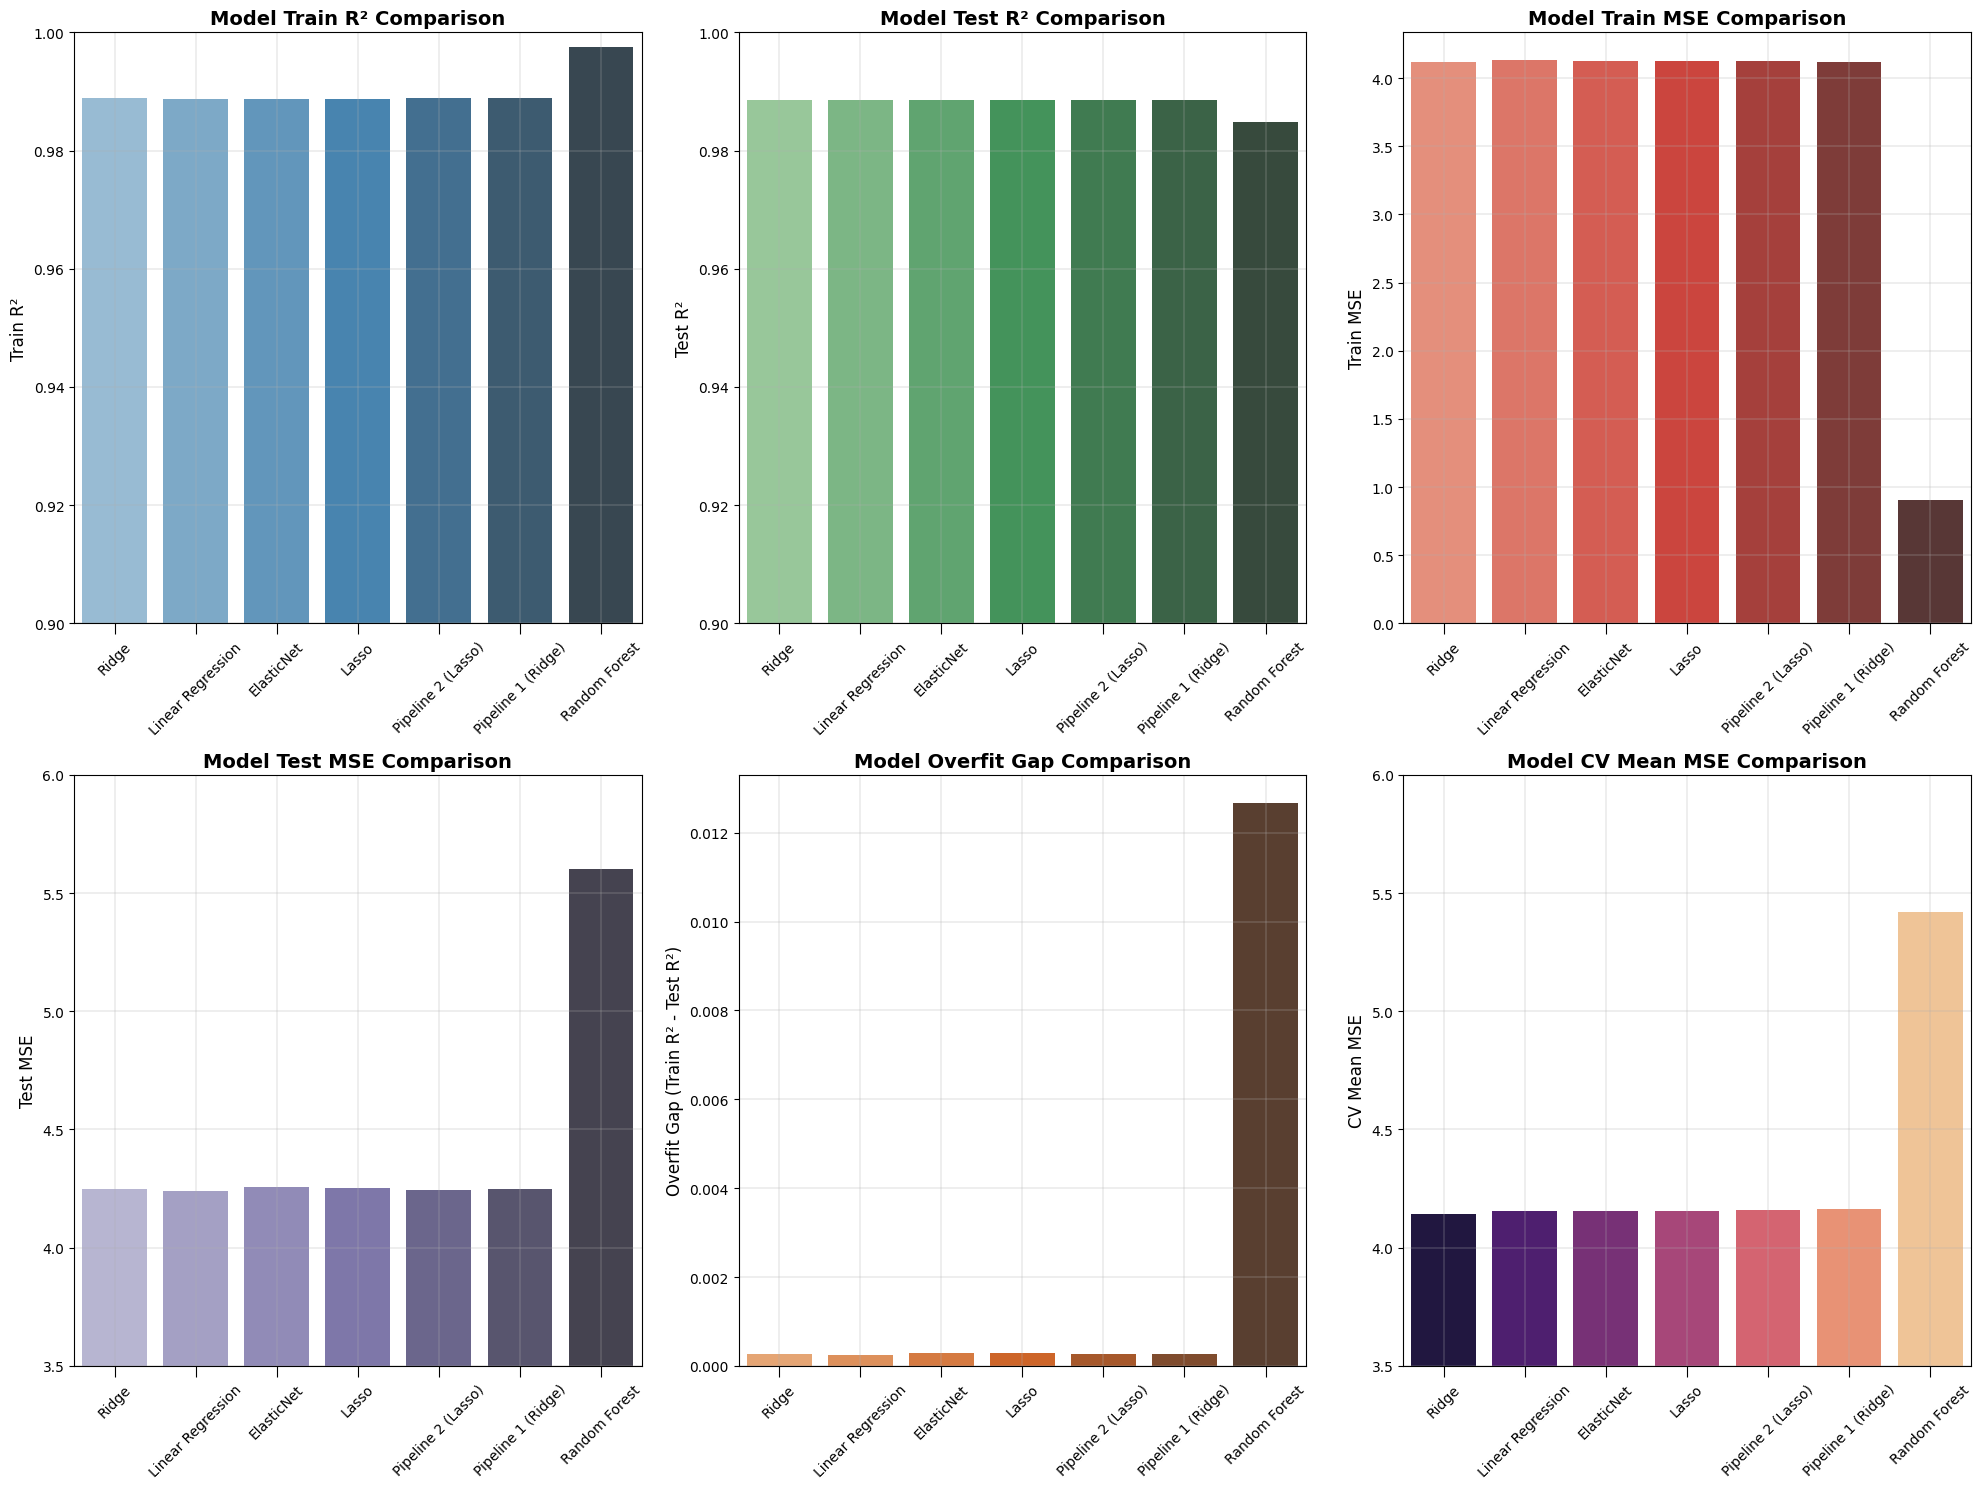

In [28]:
fig = plt.figure(figsize=(20, 15))


ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)



sns.barplot(data=df_model_performance_sorted, x='Model', y='Train R²', palette='Blues_d', ax=ax1)
ax1.set_title('Model Train R² Comparison', fontsize=14, fontweight = "bold")
ax1.set_ylabel('Train R²', fontsize=12)
ax1.set_xlabel('')
ax1.grid(True, linewidth=0.3)
ax1.tick_params(axis='x', rotation=45, size=8)
ax1.set_ylim(0.9, 1.0)


sns.barplot(data=df_model_performance_sorted, x='Model', y='Test R²', palette='Greens_d', ax=ax2)
ax2.set_title('Model Test R² Comparison', fontsize=14, fontweight = "bold")
ax2.set_ylabel('Test R²', fontsize=12)
ax2.set_xlabel('')
ax2.grid(True, linewidth=0.3)
ax2.tick_params(axis='x', rotation=45, size=8)
ax2.set_ylim(0.9, 1.0)

sns.barplot(data=df_model_performance_sorted, x='Model', y='Train MSE', palette='Reds_d', ax=ax3)
ax3.set_title('Model Train MSE Comparison', fontsize=14, fontweight = "bold")
ax3.set_ylabel('Train MSE', fontsize=12)
ax3.set_xlabel('')
ax3.grid(True, linewidth=0.3)
ax3.tick_params(axis='x', rotation=45, size=8)

sns.barplot(data=df_model_performance_sorted, x='Model', y='Test MSE', palette='Purples_d', ax=ax4)
ax4.set_title('Model Test MSE Comparison', fontsize=14, fontweight = "bold")
ax4.set_ylabel('Test MSE', fontsize=12)
ax4.set_xlabel('')
ax4.grid(True, linewidth=0.3)
ax4.tick_params(axis='x', rotation=45, size=8)
ax4.set_ylim(3.5,6)

sns.barplot(data=df_model_performance_sorted, x='Model', y='Overfit Gap', palette='Oranges_d', ax=ax5)
ax5.set_title('Model Overfit Gap Comparison', fontsize=14, fontweight = "bold")
ax5.set_ylabel('Overfit Gap (Train R² - Test R²)', fontsize=12)
ax5.set_xlabel('')
ax5.grid(True, linewidth=0.3)
ax5.tick_params(axis='x', rotation=45, size=8)

sns.barplot(data=df_model_performance_sorted, x='Model', y='CV Mean MSE', palette='magma', ax=ax6)
ax6.set_title('Model CV Mean MSE Comparison', fontsize=14, fontweight = "bold")
ax6.set_ylabel('CV Mean MSE', fontsize=12)
ax6.set_xlabel('')
ax6.grid(True, linewidth=0.3)
ax6.tick_params(axis='x', rotation=45, size=8)
ax6.set_ylim(3.5,6)




plt.tight_layout()
plt.show()

## 10.3 Discussion

Overall, the linear-family models—Linear Regression, Ridge, Lasso, ElasticNet, and their pipeline versions—consistently achieve the best balance of accuracy, stability, and generalization.

**Best generalization**

Ridge Regression (α=10) and the Ridge Pipeline (α=0.01) demonstrate:

- lowest Test MSE among all models

- extremely small overfitting gap

- very stable CV performance

This indicates excellent predictive power and robustness.

**Lasso & ElasticNet**

They behave almost identically to Ridge, but do not significantly outperform it. Lasso does little coefficient shrinkage because the dataset contains no redundant features, so sparsity doesn’t help.

**Pipelines**

Pipelines structure preprocessing cleanly and prevent data leakage, but:

- their performance closely matches non-pipeline versions

- they do not produce a meaningful accuracy gain (as expected)

They’re still the preferred approach in production workflows.

**Random Forest**

RF achieves the best training R² (expected due to nonlinearity), but:

- higher Test MSE

- larger overfitting gap

- highest CV variance

This confirms it overfits slightly and does not match the linear models on this dataset.

## 10.4 Best Performing Model and Why

10.1 Best Performing Model and Why

Across all models tested—baseline linear regression, polynomial-regularized models, pipelines, and Random Forest—the Ridge Regression model with polynomial features emerged as the strongest overall performer. It achieved:

- Low Test MSE (among the lowest of all models)

- High Test R² (≈0.9885)

- Very small overfitting gap

- Stable and low-variance cross-validation error

Ridge regularization helped maintain model stability while allowing the polynomial feature space to slightly improve fit without overfitting. This combination offered the best balance between bias and variance.

Although other regularized models (Lasso, ElasticNet) performed nearly identically, they did not provide a meaningful improvement. Random Forest, while flexible, introduced unnecessary complexity and overfit more than the linear models. Given the dataset’s highly linear structure, a regularized linear model was the best match.

## 10.5 Key Drivers of Final Grade

From the coefficient analysis (linear/regularized models) and feature importance (Random Forest), the main contributors to predicting a student’s final grade are:

1. Previous Scores — the strongest predictor

This feature consistently had the highest absolute coefficient and the highest correlation with Final Grade.
Students with stronger academic history tend to maintain strong performance.

2. Hours Studied

A meaningful positive relationship appears here. More study hours correspond to higher final grades, though with diminishing returns.

3. Sample Question Papers Practiced

This feature contributes positively, suggesting that targeted practice (not just raw study hours) improves outcomes.

4. Sleep Hours

While less influential than the academic factors, sleep still shows a slight positive effect—students with more consistent sleep tend to perform marginally better.

5. Extracurricular Activities

This feature shows very small or near-zero influence, meaning participation does not meaningfully reduce academic performance when balanced.